In [1]:
dummy_var = 0

In [3]:
import pandas as pd
from importlib import reload

# import pycausalmatch as pycm
from pycausalmatch import R_MarketMatching as rmm

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [5]:
dir(rmm)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'best_matches',
 'calculate_distances',
 'create_market_vectors',
 'dw',
 'inference',
 'lagp',
 'log_plus',
 'mape_no_zeros',
 'read_data',
 'sapply',
 'stop_if']

In [4]:
ip_weather_data_path = './datasets/weather.csv'
weather_df = rmm.read_data(ip_weather_data_path)
weather_df.head(2)

,Area,Date,Mean_TemperatureF
0,SFO,2014-01-01,49
1,SFO,2014-01-02,53


In [32]:
mm_only_cph = rmm.best_matches(data=weather_df, id_variable='Area', date_variable='Date',
                                  markets_to_be_matched = ['CPH'],
                                  matching_variable='Mean_TemperatureF', parallel=False,
                                  warping_limit=1, dtw_emphasis=1,  matches=5,
                                  start_match_period='2014-01-01', end_match_period='2014-10-01'
                                 )

In [33]:
mm_only_cph.keys()

dict_keys(['best_matches', 'data', 'market_id', 'matching_metric', 'date_variable', 'suggested_test_control_splits'])

In [34]:
mm_only_cph["best_matches"]

,Area,BestControl,RelativeDistance,Correlation,Length,SUMTEST,SUMCNTL,RAWDIST,Correlation_of_logs,matching_start_date,matching_end_date,rank
14,CPH,ZRH,0.106374,0.901823,274.0,14308.0,14485.0,1522.0,0.901823,2014-01-01,2014-10-01,0
9,CPH,STR,0.108611,0.905298,274.0,14308.0,14733.0,1554.0,0.905298,2014-01-01,2014-10-01,1
3,CPH,LHR,0.154669,0.896006,274.0,14308.0,15304.0,2213.0,0.896006,2014-01-01,2014-10-01,2
12,CPH,BOS,0.248253,0.862522,274.0,14308.0,14611.0,3552.0,0.862522,2014-01-01,2014-10-01,3
1,CPH,JFK,0.273903,0.889211,274.0,14308.0,15360.0,3919.0,0.889211,2014-01-01,2014-10-01,4
15,CPH,IST,0.377621,0.884843,274.0,14308.0,17417.0,5403.0,0.884843,2014-01-01,2014-10-01,5


In [35]:
results_only_cph = rmm.inference(matched_markets = mm_only_cph,
                                     test_market = "CPH",
                                     end_post_period = "2015-10-01"
                                     )

------------- Inputs -------------
Test Market: CPH
Control Market 0: BOS
Control Market 1: IST
Control Market 2: JFK
Control Market 3: LHR
Control Market 4: STR
Control Market 5: ZRH
prior_level_sd : 0.01
No seasonality component (controlled for by the matched markets) 
Posterior Intervals Tail Area: 95.0


/Users/rjuma001/anaconda3/envs/ci/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/rjuma001/anaconda3/envs/ci/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


------------- Model Stats -------------
Matching (pre) Period MAPE: 


In [36]:
results_only_cph

{'causal_impact_object': <causalimpact.main.CausalImpact at 0x7fe2afb7c730>,
 'summary_data':                     average   cumulative
 actual            46.032967  4189.000000
 predicted         53.212065  4842.297959
 predicted_lower   50.694273  4613.178819
 predicted_upper   55.747791  5073.048953
 abs_effect        -7.179098  -653.297959
 abs_effect_lower  -9.714824  -884.048953
 abs_effect_upper  -4.661306  -424.178819
 rel_effect        -0.134915    -0.134915
 rel_effect_lower  -0.182568    -0.182568
 rel_effect_upper  -0.087599    -0.087599,
 'all_output_plots': <bound method Plot.plot of <causalimpact.main.CausalImpact object at 0x7fe2afb7c730>>}

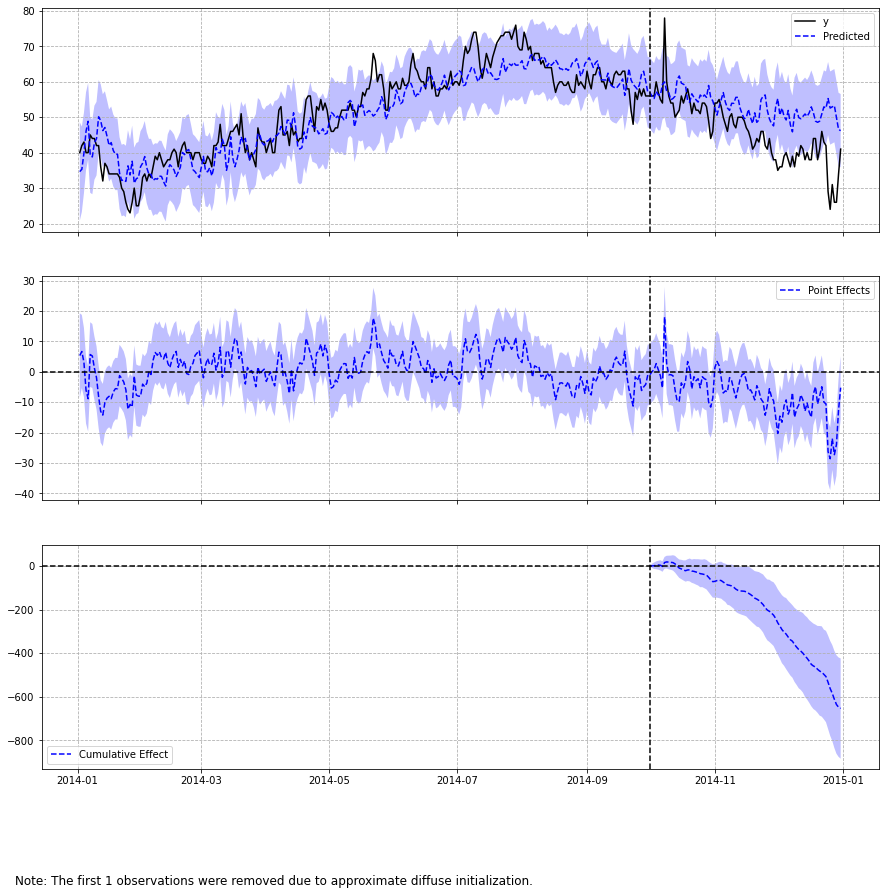

In [37]:
results_only_cph['all_output_plots'](figsize=(15, 14))

In [24]:
dir(results_only_cph['causal_impact_object'])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_compile_posterior_inferences',
 '_compute_p_value',
 '_convert_index_to_datetime',
 '_convert_str_period_to_int',
 '_fit_model',
 '_format_input_data',
 '_get_cum_index',
 '_get_default_model',
 '_get_plotter',
 '_inferences',
 '_model',
 '_model_args',
 '_p_value',
 '_process_alpha',
 '_process_fit_args',
 '_process_input_data',
 '_process_input_model',
 '_process_model_args',
 '_process_period',
 '_process_posterior_inferences',
 '_process_pre_post_data',
 '_simulated_y',
 '_standardize_pre_post_data',
 '_summarize_posterior_inferences',
 '_unstardardize',
 '_validate_y',
 'alpha',
 'data',
 'inferences',
 'lower_uppe

In [25]:
results_only_cph['causal_impact_object'].data

,y,ref
date,,
2014-01-01,38,24
2014-01-02,40,14
2014-01-03,42,8
2014-01-04,43,15
2014-01-05,40,31
...,...,...
2014-12-27,31,45
2014-12-28,26,46
2014-12-29,26,36


In [26]:
results_only_cph['causal_impact_object'].inferences

,post_cum_y,preds,post_preds,post_preds_lower,post_preds_upper,preds_lower,preds_upper,post_cum_pred,post_cum_pred_lower,post_cum_pred_upper,point_effects,point_effects_lower,point_effects_upper,post_cum_effects,post_cum_effects_lower,post_cum_effects_upper
date,,,,,,,,,,,,,,,,
2014-01-01,NaN,42.377203,NaN,NaN,NaN,-23842.992106,23927.746512,NaN,NaN,NaN,-4.377203,-23889.746512,23880.992106,NaN,NaN,NaN
2014-01-02,NaN,34.643876,NaN,NaN,NaN,20.725367,48.562385,NaN,NaN,NaN,5.356124,-8.562385,19.274633,NaN,NaN,NaN
2014-01-03,NaN,35.309398,NaN,NaN,NaN,23.253913,47.364884,NaN,NaN,NaN,6.690602,-5.364884,18.746087,NaN,NaN,NaN
2014-01-04,NaN,39.892038,NaN,NaN,NaN,28.524412,51.259664,NaN,NaN,NaN,3.107962,-8.259664,14.475588,NaN,NaN,NaN
2014-01-05,NaN,46.041133,NaN,NaN,NaN,35.032924,57.049342,NaN,NaN,NaN,-6.041133,-17.049342,4.967076,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,4062.0,52.924398,52.924398,42.592492,63.256304,42.592492,63.256304,4646.374155,4448.449250,4859.550091,-21.924398,-32.256304,-11.592492,-584.374155,-797.550091,-386.449250
2014-12-28,4088.0,53.260010,53.260010,42.924129,63.595891,42.924129,63.595891,4699.634165,4497.170333,4912.361433,-27.260010,-37.595891,-16.924129,-611.634165,-824.361433,-409.170333
2014-12-29,4114.0,49.903885,49.903885,39.564031,60.243740,39.564031,60.243740,4749.538051,4547.346971,4971.972376,-23.903885,-34.243740,-13.564031,-635.538051,-857.972376,-433.346971
